# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

## Plan de solución

Verificación y Corrección de Tipos de Datos: Comenzaré revisando los tipos de datos de cada columna en los DataFrames. Es fundamental asegurarme de que todas las columnas de identificación, como los IDs de órdenes, productos y usuarios, estén correctamente definidas como enteros. Esto es crucial para facilitar la manipulación de los datos y ayudar a prevenir errores durante los análisis y las operaciones de fusión de datos.

Identificación y Manejo de Valores Ausentes: Utilizaré funciones en pandas para detectar y contar los valores ausentes en mis datos. Dependiendo de cada caso, podría optar por rellenar estos valores con la media o la mediana para mantener la consistencia del dataset, o podría decidir eliminar filas o columnas que presenten un alto porcentaje de datos faltantes. Esta decisión dependerá de la relevancia de los datos faltantes para los análisis que planeo realizar y de la cantidad de información ausente.

Eliminación de Duplicados: Es esencial eliminar cualquier duplicado en los datos para evitar distorsiones en los análisis. Los duplicados pueden influir en los resultados, haciendo parecer que ciertos fenómenos son más frecuentes de lo que realmente son. Utilizaré herramientas de pandas para identificar y eliminar estos duplicados eficientemente.

In [1]:
import pandas as pd# importar librerías

In [2]:
df_orders = pd.read_csv('/datasets/instacart_orders.csv',delimiter=';')
df_products = pd.read_csv('/datasets/products.csv',delimiter=';')
df_aisles = pd.read_csv('/datasets/aisles.csv',delimiter=';')
df_departments = pd.read_csv('/datasets/departments.csv',delimiter=';')
df_order_products = pd.read_csv('/datasets/order_products.csv',delimiter=';')
# leer conjuntos de datos en los DataFrames

In [3]:
print(df_orders.head())# mostrar información del DataFrame

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [4]:
print(df_products.head())# mostrar información del DataFrame

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
print(df_aisles.head())# mostrar información del DataFrame

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
print(df_departments.head())# mostrar información del DataFrame

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
print(df_order_products.head())# mostrar información del DataFrame

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


### Conclusiones

Los datos parecen tener consistencia lo cual es fundamental para que las relaciones entre tablas sean integras esto para los futuros analisis que haremos. 
A simple vista también parece ser que los daros tienen pocos valores ausentes, falta entrar mas a detalle para saber la realidad.
Tener distintas conexiones entre tablas da pie a una gran cantidad de analisis detallados


## Preprocesamiento de los datos

### `orders` data frame

In [8]:
print(df_orders.duplicated().sum())# Revisa si hay pedidos duplicados
duplicate_rows = df_orders[df_orders.duplicated()]
print(duplicate_rows) #Imprimo las filas duplicadas


15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Hay líneas duplicadas? Si sí, ¿qué tienen en común?

Todas son del día miercoles a las 2 am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_2am_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]
print(wednesday_2am_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

El hecho de que haya una cantidad significativa de pedidos realizados en un tiempo específico podría indicar un patrón de comportamiento de los consumidores

In [10]:
df_orders.drop_duplicates(inplace=True)# Elimina los pedidos duplicados


In [11]:
print(df_orders.duplicated().sum())# Vuelve a verificar si hay filas duplicadas


0


In [12]:

order_counts = df_orders.groupby('order_id').size()

duplicate_orders = order_counts[order_counts > 1]

print(len(duplicate_orders))# Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0


Después de detectar duplicados en la columna order_id del DataFrame df_orders, procedí a eliminarlos para asegurar la integridad de los datos. 

### `products` data frame

In [13]:
print(df_products.duplicated().sum())# Verifica si hay filas totalmente duplicadas

0


In [14]:
print(df_departments['department_id'].duplicated().sum())
# Revisa únicamente si hay ID de departamentos duplicados


0


In [15]:
df_products['product_name_upper'] = df_products['product_name'].str.upper().str.strip()#Aqui convierto los nombres para quitar los espacios que pudieran tener

print(df_products['product_name_upper'].duplicated().sum())# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

1361


In [16]:
df_products_non_null = df_products[df_products['product_name'].notna()]

# Filtro y suma de productos no nulos duplicados
duplicate_product_names = df_products_non_null['product_name_upper'].duplicated().sum()
# número de nombres de productos no nulos duplicados encontrados
print(duplicate_product_names)
print(df_products_non_null[df_products_non_null['product_name_upper'].duplicated(keep=False)].sort_values(by='product_name_upper'))
df_products.info()


104
       product_id                               product_name  aisle_id  \
23339       23340  18-in-1 Hemp Peppermint Pure-Castile Soap        25   
31844       31845  18-In-1 Hemp Peppermint Pure-Castile Soap        25   
19941       19942            Aged Balsamic Vinegar Of Modena        19   
13152       13153            Aged Balsamic Vinegar of Modena        19   
24830       24831         Albacore Solid White Tuna in Water        95   
...           ...                                        ...       ...   
46873       46874                         Vitamin D3 5000 IU        47   
21366       21367              Wild Sardines in Spring Water        95   
40093       40094              Wild Sardines In Spring Water        95   
1826         1827           Yams Cut Sweet Potatoes in Syrup        81   
38260       38261           Yams Cut Sweet Potatoes In Syrup        81   

       department_id                         product_name_upper  
23339             11  18-IN-1 HEMP PEPPER

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Durante el análisis del conjunto de datos de productos, identifiqué que varios productos compartían el mismo nombre pero tenían diferentes IDs. Esto podría complicar el análisis y la interpretación de los datos debido a posibles confusiones sobre la identidad del producto.

Decidí no eliminar ni fusionar estos registros para evitar la pérdida de información que es relevante para otros DataFrames del proyecto, como el df_order_products. En lugar de eso, planeo adoptar un enfoque de análisis que agrupa los datos por nombre del producto, permitiendo un manejo más claro sin comprometer los detalles específicos de cada producto.


El análisis de los 104 productos duplicados revela que estos productos comparten el mismo nombre pero tienen diferentes IDs, lo que sugiere que podrían ser variantes del mismo producto o productos similares. Esto podría deberse a diferentes marcas, tamaños de envases o versiones del producto.

### `departments` data frame

In [17]:
print(df_departments.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [18]:
print(df_departments['department_id'].duplicated().sum())
# Revisa únicamente si hay IDs duplicadas de department id
df_departments.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



No encontré ningun duplicado esto significa que cada departamento tiene un identificador único por lo tanto la integridad de mis datos es buena

### `aisles` data frame

In [19]:
print(df_aisles.duplicated().sum())# Revisa si hay filas totalmente duplicadas

0


In [20]:
print(df_aisles['aisle_id'].duplicated().sum())# Revisa únicamente si hay IDs duplicadas de productos

0



Descubrí que cada pasillo esta correctamente identificado ya que cada pasillo tiene un identificador unico e irrepetible.

### `order_products` data frame

In [21]:
print(df_order_products.duplicated().sum())# Revisa si hay filas totalmente duplicadas


0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products.duplicated(subset=['order_id', 'product_id']).sum())

0



Este ultimo resultado me asegura que puedo trabajar con mis datos ya que no se encuentran duplicados

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
print(df_products['product_name'].isna().sum())
missing_product_rows = df_products[df_products['product_name'].isna()]
print(missing_product_rows.sample(10))#Encuentra los valores ausentes en la columna 'product_name'

1258
       product_id product_name  aisle_id  department_id product_name_upper
18106       18107          NaN       100             21                NaN
42033       42034          NaN       100             21                NaN
43249       43250          NaN       100             21                NaN
33166       33167          NaN       100             21                NaN
42538       42539          NaN       100             21                NaN
24771       24772          NaN       100             21                NaN
27120       27121          NaN       100             21                NaN
47886       47887          NaN       100             21                NaN
40258       40259          NaN       100             21                NaN
9250         9251          NaN       100             21                NaN


Describe brevemente cuáles son tus hallazgos.

Descubrí que todos estos registros pertenecen al mismo pasillo (100) y departamento (21). Esto sugiere que podría haber un problema sistemático con la forma en que se han ingresado o registrado los datos para este pasillo y departamento específicos

In [24]:
missing_products_aisle = (df_products['product_name'].isna() & (df_products['aisle_id'] == 100)).sum()#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(missing_products_aisle)

1258


Describe brevemente cuáles son tus hallazgos.

Al parecer compruebo que efectivamente sí esta relacionado completamente con el pasillo 100

In [25]:
missing_products_department = (df_products['product_name'].isna() & (df_products['department_id'] == 21)).sum()# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(missing_products_department)

1258


Describe brevemente cuáles son tus hallazgos.

Esto sugiere una posible conexión entre la ausencia de nombres de productos y ciertas características específicas de los pasillos y departamentos. 

In [26]:
aisle_100 = df_aisles[df_aisles['aisle_id'] == 100]
department_21 = df_departments[df_departments['department_id'] == 21]
print(aisle_100)
print(department_21)# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

 Esto sugiere que estos IDs se utilizan para productos cuyo pasillo o departamento no se especifican o están desconocidos en la base de datos. 

In [27]:
df_products['product_name'].fillna('Unknown',inplace=True)
df_products.info()#Completa los nombres de productos ausentes con 'Unknown'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          49694 non-null  int64 
 1   product_name        49694 non-null  object
 2   aisle_id            49694 non-null  int64 
 3   department_id       49694 non-null  int64 
 4   product_name_upper  48436 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se identificaron 1258 valores ausentes en la columna "product_name". Al revisar, se encontró que todos estos valores faltantes estaban asociados al pasillo con ID 100 y al departamento con ID 21. Para abordar esta situación, se completaron los nombres de productos ausentes con "Unknown". Ahora, el DataFrame df_products no tiene valores nulos en la columna "product_name".

### `orders` data frame

In [28]:
print(df_orders.isna().sum())# Encuentra los valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
missing_days_since = df_orders['days_since_prior_order'].isna()
print(df_orders[missing_days_since])# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores nulos en la columna days_since_prior_order corresponden a los primeros pedidos de cada usuario, ya que no hay un pedido anterior del cual calcular la cantidad de días desde el último pedido. Esto tiene sentido y es coherente con el significado de la columna.
Dado que estos valores nulos en la columna days_since_prior_order corresponden al primer pedido de cada usuario, no hay forma de calcular cuántos días han pasado desde el pedido anterior. Por lo tanto, dejarlos como valores nulos es coherente y no afectará negativamente al análisis posterior, siempre y cuando se tenga en cuenta esta peculiaridad durante el análisis de los datos.

### `order_products` data frame

In [30]:
print(df_order_products.isna().sum())# Encuentra los valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
print(df_order_products['add_to_cart_order'].min(),':mínimo')
print(df_order_products['add_to_cart_order'].max(),':máximo')# ¿Cuáles son los valores mínimos y máximos en esta columna?


1.0 :mínimo
64.0 :máximo


Describe brevemente cuáles son tus hallazgos.

Mis hallazgos muestran que la columna "add_to_cart_order" tiene 836 valores ausentes. Además, el valor mínimo en esta columna es 1 y el valor máximo es 64. Esto indica que los productos en la mayoría de los pedidos se agregaron en orden secuencial, comenzando desde el número 1 hasta el 64 como máximo.

In [32]:
missing_add_to_cart_order_ids = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(missing_add_to_cart_order_ids)# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
missing_add_to_cart_order_rows = df_order_products[df_order_products['order_id'].isin(missing_add_to_cart_order_ids)]
print(missing_add_to_cart_order_rows.sample(5))# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
missing_orders_grouped = df_order_products[df_order_products['order_id'].isin(missing_add_to_cart_order_ids)].groupby('order_id')['product_id'].count()
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
min_product_count = missing_orders_grouped.min()# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(min_product_count)

         order_id  product_id  add_to_cart_order  reordered
4077045   1169835       17328               51.0          1
297192     180546       31040               32.0          1
1590676    813364        3376               62.0          0
3516268    102236       19677               60.0          0
2234395    854647       44051               50.0          0
65


Describe brevemente cuáles son tus hallazgos.

El valor mínimo del conteo de productos en pedidos con datos faltantes es 65.

In [34]:
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontré que la columna 'add_to_cart_order' tenía valores ausentes y que estos se debían a que superaban los 64 productos por lo tanto agrupe para contar y me di cuenta que esto empezaba a pasar a partir de que se agregaran 65 productos. Esto provocaba un valor nulo, por lo que los reemplacé con el valor 999 y luego convertí la columna al tipo entero. 

Podría decirse que los pedidos que tienen más de 64 productos podrían considerarse como pedidos grandes. Esto significaría que los clientes que realizaron estos pedidos pueden estar comprando en grandes cantidades o realizando compras masivas.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


Encontré valores ausentes en varias columnas, como "product_name" en el dataframe de productos y "days_since_prior_order" en el dataframe de pedidos. Para abordar esto, completé los valores ausentes en "product_name" con "Unknown" y dejé los valores ausentes en "days_since_prior_order" como están, ya que corresponden al primer pedido del usuario.

Detecté y eliminé duplicados en los dataframes de pedidos y productos, asegurando la integridad de los datos y evitando inconsistencias en el análisis posterior.

Corregí los tipos de datos, como convirtiendo la columna "add_to_cart_order" en el dataframe de order_products a tipo entero después de rellenar los valores ausentes.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

### [A1] Verifica que los valores sean sensibles

In [35]:
print(df_orders['order_hour_of_day'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [36]:
print(df_orders['order_dow'].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Escribe aquí tus conclusiones

Para 'order_hour_of_day', el mínimo es 0 y el máximo es 23, lo que coincide con las horas del día. Para 'order_dow', el mínimo es 0 (que probablemente represente el domingo) y el máximo es 6 (que representa el sábado), lo que también es consistente con los días de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

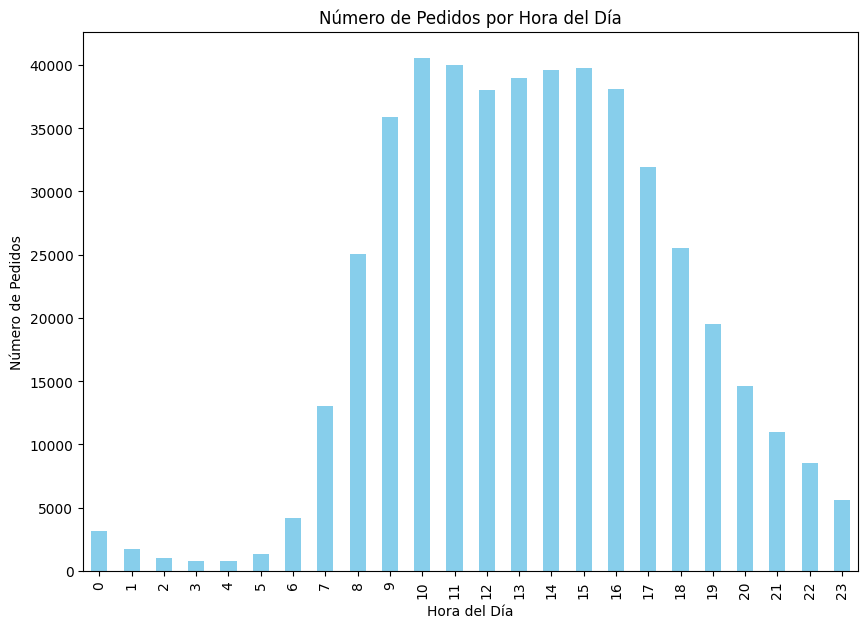

In [37]:
import matplotlib.pyplot as plt

orders_by_hour = df_orders['order_hour_of_day'].value_counts().sort_index()

orders_by_hour.plot(figsize =(10,7),
                    kind='bar',
                    color='skyblue',
                    title='Número de Pedidos por Hora del Día',
                    xlabel='Hora del Día',
                    ylabel='Número de Pedidos')
plt.show()


Puedo concluir que las horas en las que hay mas pedidos son de 10:00 am a 4:00pm

### [A3] ¿Qué día de la semana compran víveres las personas?

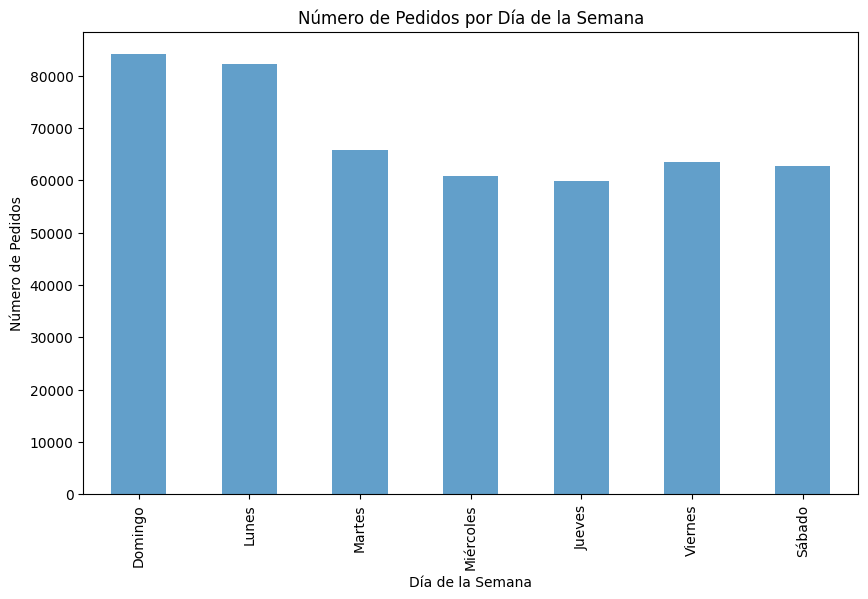

In [38]:
import matplotlib.pyplot as plt

orders_by_dow = df_orders['order_dow'].value_counts().sort_index()
days_of_week = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
orders_by_dow.plot(kind='bar',
                   figsize=(10, 6),
                   title='Número de Pedidos por Día de la Semana',
                   xlabel='Día de la Semana',
                   ylabel='Número de Pedidos',
                   alpha=0.7)
plt.xticks(range(7), days_of_week)
plt.show()


Los Domingos y Lunes son los días en los que la gente tiende a hacer sus compras

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

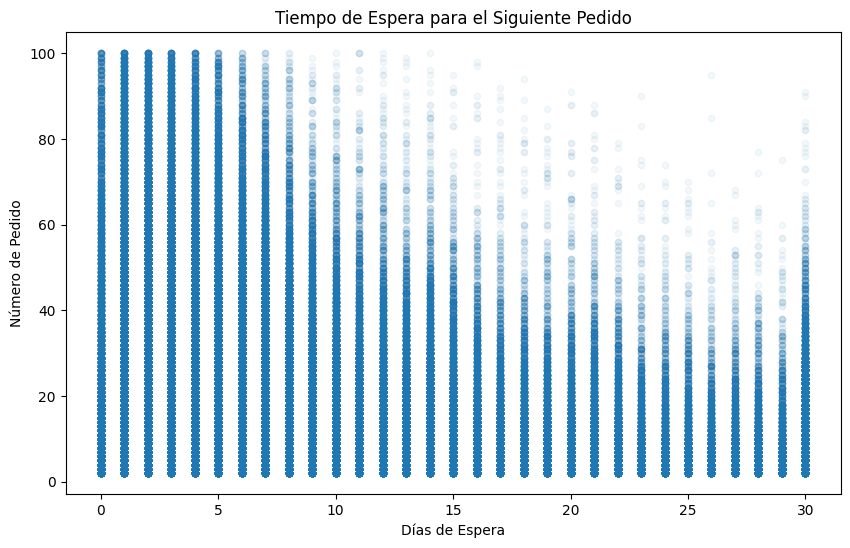

El tiempo mínimo de espera para el siguiente pedido es: 0.0 días.
El tiempo máximo de espera para el siguiente pedido es: 30.0 días.


In [39]:
df_orders_clean = df_orders.dropna(subset=['days_since_prior_order'])
df_orders_clean = df_orders_clean.sort_values(by='days_since_prior_order')


df_orders_clean.plot(x='days_since_prior_order',
                     kind='scatter',
                     y='order_number',
                     title='Tiempo de Espera para el Siguiente Pedido',
                     xlabel='Días de Espera',
                     ylabel='Número de Pedido',
                     alpha = 0.05,
                     figsize=(10, 6))
plt.show()

min_days = df_orders_clean['days_since_prior_order'].min()
max_days = df_orders_clean['days_since_prior_order'].max()

print("El tiempo mínimo de espera para el siguiente pedido es:", min_days, "días.")
print("El tiempo máximo de espera para el siguiente pedido es:", max_days, "días.")



Podemos observar e inferir que las personas que menos tardan en volver a hacer un pedido son las personas que menos pedidos han hecho, esto podría deberse a que no tienen ese hábito de pedir a través de la aplicación entonces esperan más para volver a pedir pero este tiempo se acorta conforme más pedidos hacen.

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
orders_wednesday = df_orders[df_orders['order_dow'] == 3]

orders_saturday = df_orders[df_orders['order_dow'] == 6]

hour_counts_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()

hour_counts_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

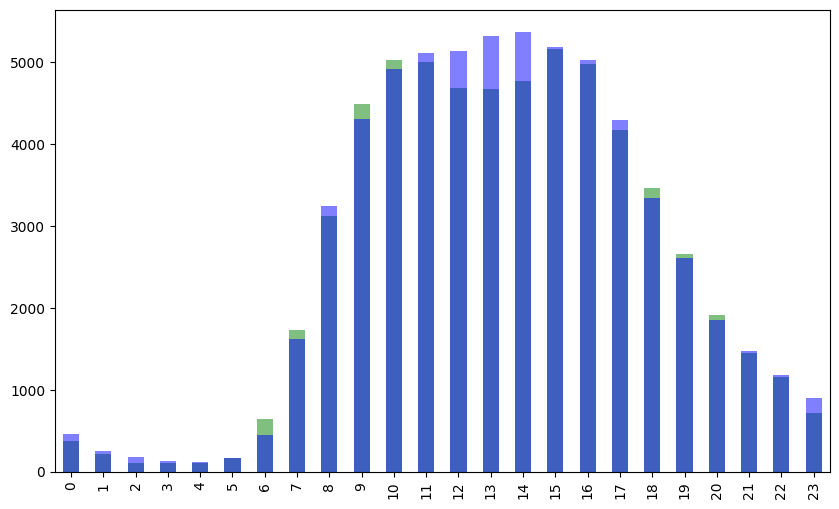

In [41]:
hour_counts_wednesday.plot(figsize=(10,6),
                          kind ='bar',
                          color = 'green',
                          alpha= 0.5,
                          label = 'Miercoles')
hour_counts_saturday.plot(figsize=(10,6),
                          kind ='bar',
                          color = 'blue',
                          alpha= .5,
                          label = 'Sabado')
plt.show()


Entre semana los horarios de 11-2pm no tienen tanto auge para pedir comida como lo tienen lso fines de semana

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [42]:
orders_per_user = df_orders['user_id'].value_counts()

orders_distribution = orders_per_user.value_counts().sort_index()

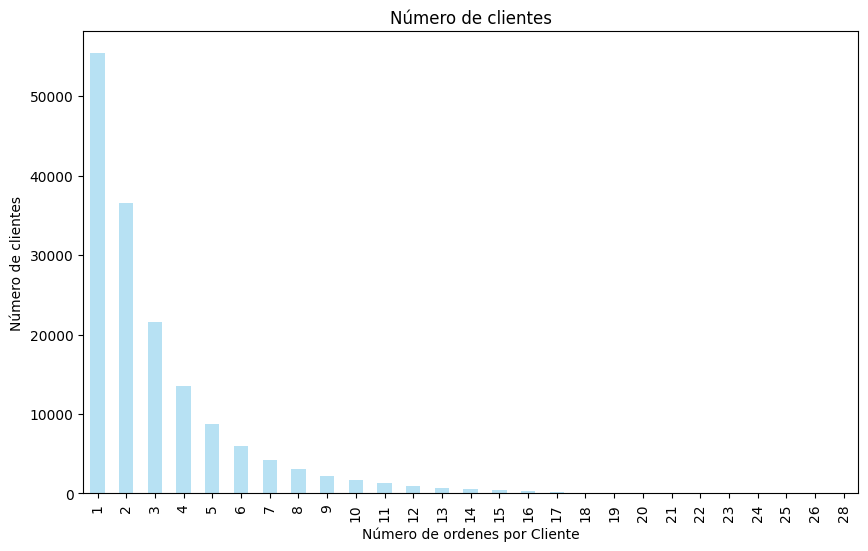

In [43]:
orders_distribution.plot(figsize =(10,6),
                        xlabel ='Número de ordenes por Cliente',
                        ylabel ='Número de clientes',
                        title = 'Número de clientes',
                        color = 'skyblue',
                        kind= 'bar',
                        alpha = 0.6,
                        )
plt.show()


Los clientes tienden a pedir pocas veces, se debe de encontrar un metodo para fidelizar a los clientes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [44]:
top_products = df_order_products['product_id'].value_counts().head(20)

In [45]:
top_products_names = df_products.set_index('product_id').loc[top_products.index]['product_name']


    Product ID              Product Name  Frequency
0        24852                    Banana      66050
1        13176    Bag of Organic Bananas      53297
2        21137      Organic Strawberries      37039
3        21903      Organic Baby Spinach      33971
4        47209      Organic Hass Avocado      29773
5        47766           Organic Avocado      24689
6        47626               Large Lemon      21495
7        16797              Strawberries      20018
8        26209                     Limes      19690
9        27845        Organic Whole Milk      19600
10       27966       Organic Raspberries      19197
11       22935      Organic Yellow Onion      15898
12       24964            Organic Garlic      15292
13       45007          Organic Zucchini      14584
14       39275       Organic Blueberries      13879
15       49683            Cucumber Kirby      13675
16       28204        Organic Fuji Apple      12544
17        5876             Organic Lemon      12232
18        82

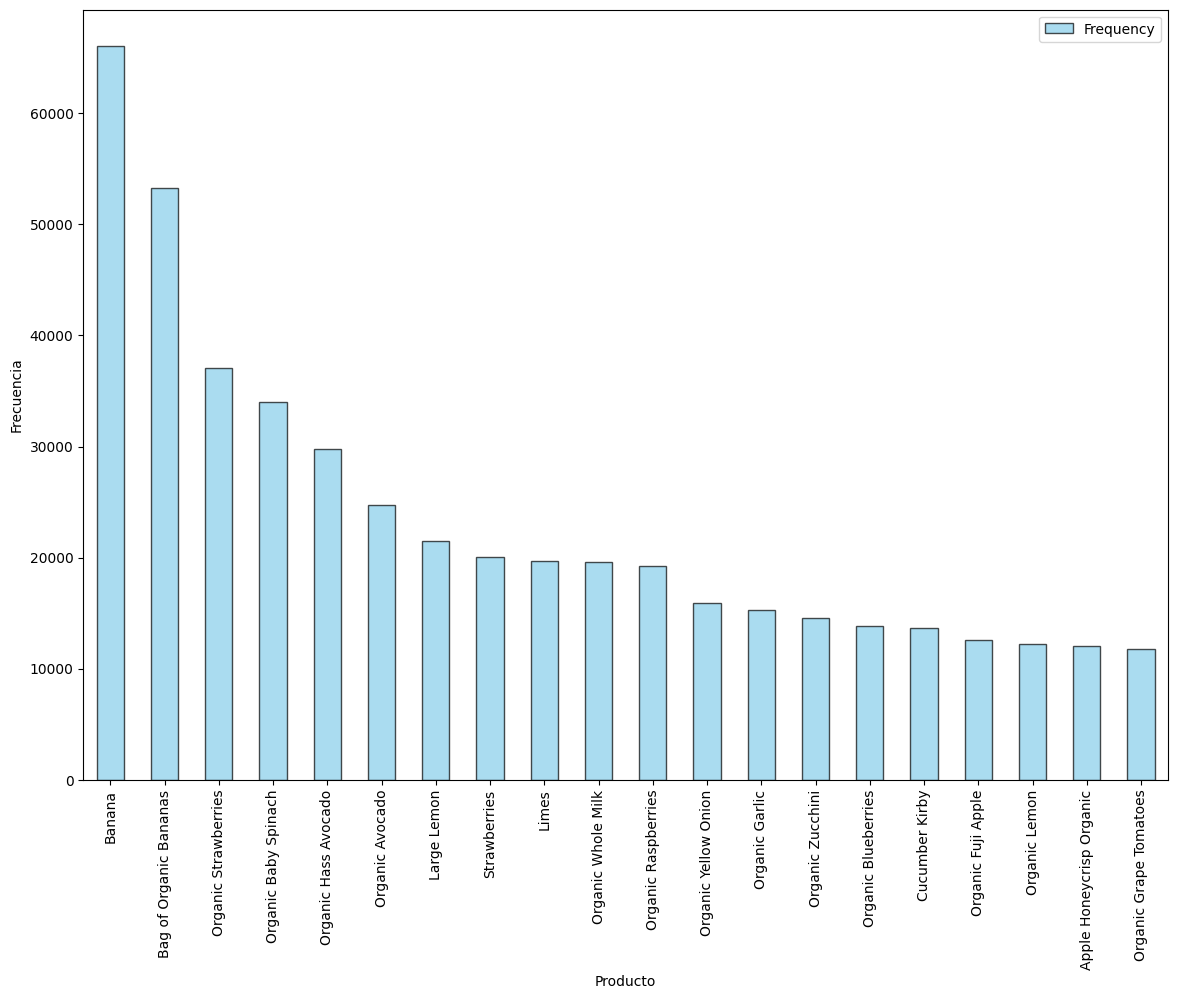

In [46]:
top_products_with_names = pd.DataFrame({'Product ID': top_products.index, 'Product Name': top_products_names.values, 'Frequency': top_products.values})
print(top_products_with_names)

top_products_with_names.plot(kind='bar',
                             x='Product Name',
                             y='Frequency',
                     color='skyblue',
                     edgecolor='black',
                     alpha=0.7,
                    xlabel ='Producto',
                    ylabel ='Frecuencia',
                    figsize=(14,10))
plt.show()

Escribe aquí tus conclusiones

Las frutas sin lugar a dudas son los productos que mas se comercializan ya que segun nuestro analisis son los que mayor volumen de ventas generan Bananas en sus distintas presentaciones y las fresas tambien no se quedan atras

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:
productos_por_pedido = df_order_products.groupby('order_id')['product_id'].count()

promedio_productos_por_pedido = productos_por_pedido.mean()

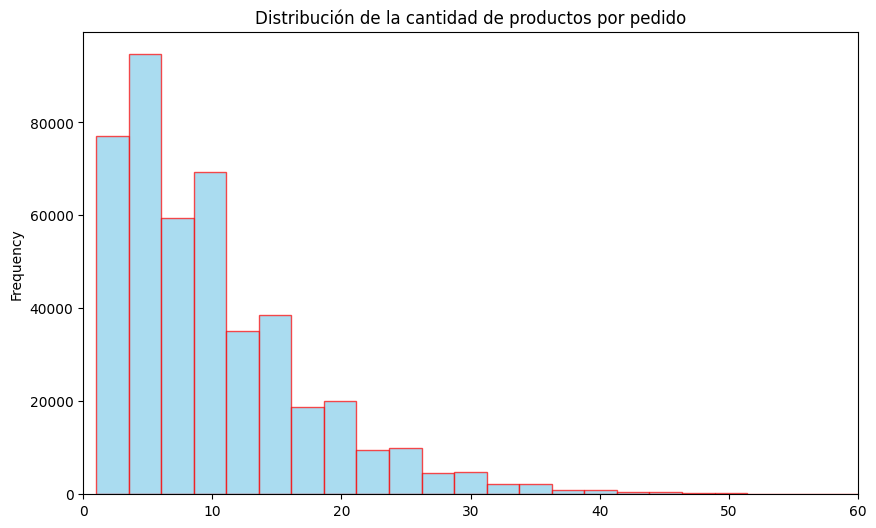

In [48]:
productos_por_pedido.plot(kind='hist',
                        bins=50,
                        color='skyblue',
                          edgecolor='red',
                        alpha=0.7,
                        xlabel='Cantidad de productos por pedido',
                        ylabel='Frecuencia',
                        figsize=(10, 6),
                         xlim=(0,60),
                         title='Distribución de la cantidad de productos por pedido')
plt.show()


La mayoría de los pedidos contienen entre 0 y 10 productos. Esto quiere decir que la mayoría de los clientes realizan pedidos relativamente pequeños.
A medida que la cantidad de productos por pedido aumenta, la frecuencia de tales pedidos disminuye. Esto indica que los pedidos más grandes son menos comunes entre los clientes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]

frecuencia_productos = reordered_products['product_id'].value_counts().head(20)

top_product_names = df_products.set_index('product_id').loc[frecuencia_productos.index]['product_name']

top_products = pd.DataFrame({'product_id': frecuencia_productos.index, 'product_name': top_product_names.values, 'reorder_frequency': frecuencia_productos.values})

print(top_products)

    product_id              product_name  reorder_frequency
0        24852                    Banana              55763
1        13176    Bag of Organic Bananas              44450
2        21137      Organic Strawberries              28639
3        21903      Organic Baby Spinach              26233
4        47209      Organic Hass Avocado              23629
5        47766           Organic Avocado              18743
6        27845        Organic Whole Milk              16251
7        47626               Large Lemon              15044
8        27966       Organic Raspberries              14748
9        16797              Strawberries              13945
10       26209                     Limes              13327
11       22935      Organic Yellow Onion              11145
12       24964            Organic Garlic              10411
13       45007          Organic Zucchini              10076
14       49683            Cucumber Kirby               9538
15       28204        Organic Fuji Apple

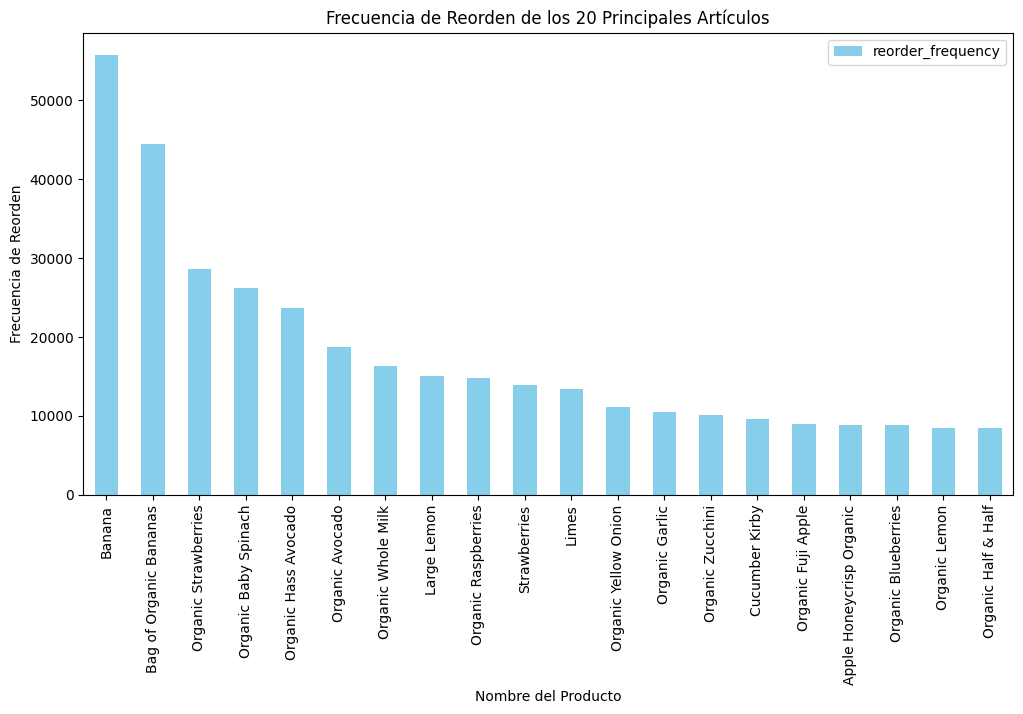

In [50]:
top_products.plot(kind='bar', 
                             x='product_name', 
                             y='reorder_frequency', 
                             figsize=(12, 6), 
                             color='skyblue', 
                             xlabel='Nombre del Producto',
                             ylabel='Frecuencia de Reorden',
                             title='Frecuencia de Reorden de los 20 Principales Artículos')
plt.show()


Las bananas y fresas junto con los aguacates siguen dando razones por los cuales son los productos que mas se venden ya que tambien son los que mas se reordenanl, esto puede deberse a que en el mercado del que se estan sacando los datos es muy comun comer estos tipos de alimentos ya que se da en la region.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
total_orders_per_product = df_order_products['product_id'].value_counts()

repeated_products = total_orders_per_product[total_orders_per_product > 1].index

total_reorders_per_product = df_order_products[df_order_products['product_id'].isin(repeated_products)]['reordered'].groupby(df_order_products['product_id']).sum()

reorder_rate_per_product = total_reorders_per_product / total_orders_per_product.loc[repeated_products]

reorder_rate_df = pd.DataFrame({'product_id': reorder_rate_per_product.index, 'reorder_rate': reorder_rate_per_product.values})

reorder_rate_df = reorder_rate_df.merge(df_products[['product_id', 'product_name']], on='product_id').sort_values(by='reorder_rate', ascending=False)

print(reorder_rate_df)


       product_id  reorder_rate  \
25995       31852           1.0   
14218       17538           1.0   
14323       17656           1.0   
21742       26677           1.0   
3928         4851           1.0   
...           ...           ...   
7962         9823           0.0   
13834       17065           0.0   
10040       12425           0.0   
10038       12422           0.0   
9134        11275           0.0   

                                            product_name  
25995                                 San Ignacio Coffee  
14218                7 Grain Non-Dairy Beverage Original  
14323                                            Unknown  
21742                         7oz GOOD & PLENTY LICORICE  
3928                         Chicken Florentine Farfelle  
...                                                  ...  
7962                                             Unknown  
13834                                            Unknown  
10040                       Hydro Body Sponge Li

In [52]:
print(reorder_rate_df.loc[:, ['reorder_rate', 'product_name']].head(15))

       reorder_rate                                       product_name
25995           1.0                                 San Ignacio Coffee
14218           1.0                7 Grain Non-Dairy Beverage Original
14323           1.0                                            Unknown
21742           1.0                         7oz GOOD & PLENTY LICORICE
3928            1.0                        Chicken Florentine Farfelle
21789           1.0                          Sparklers Tangerine Mango
37282           1.0                                   Seltzer Original
21794           1.0                            Itchy Dry Scalp Shampoo
21799           1.0  Condensed Classic Recipe Double Noodle Family ...
29741           1.0     Organic Promise Cranberry Spelt & Flax Granola
29740           1.0                                 G Series Tangerine
21835           1.0                     Gluten Free Peach Apricot Bars
37315           1.0  Vitamin Code Kids Chewable Whole Food Multivit...
14245 


Los productos que veo que se vuelven a pedir siempre ya que tienen una proporcion de 1 no son productos que sean tops de ventas pero al parecer son productos que logran mantener bien a sus clientes ya que los recompran 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
# Número total de productos repetidos por usuario
repeated_products_per_user = df_order_products[df_order_products['reordered'] == 1].groupby('order_id')['product_id'].count()

# Suma total de productos repetidos por usuario
total_repeated_products_per_user = repeated_products_per_user.sum()

# Proporción de productos repetidos por usuario
proportion_repeated_per_user = repeated_products_per_user / unique_products_per_user

# Mostrar algunas filas para verificar
print(proportion_repeated_per_user.head())

order_id
4     0.923077
9     0.666667
11    1.000000
19    1.000000
20         NaN
Name: product_id, dtype: float64


In [55]:
proportion_repeated_per_user = total_repeated_products_per_user / unique_products_per_user.sum()

print(proportion_repeated_per_user)

0.5905025008762362



La proporción de productos que cada cliente ya había pedido anteriormente es aproximadamente del 59.05%. Esto significa que, en promedio, alrededor del 59.05% de los productos en los pedidos de cada cliente son productos que ya habían pedido en el pasado.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [56]:
first_in_cart = df_order_products[df_order_products['add_to_cart_order'] == 1]

top_first_in_cart = first_in_cart['product_id'].value_counts().head(20)

top_first_in_cart_names = df_products.set_index('product_id').loc[top_first_in_cart.index]['product_name']

top_first_in_cart_df = pd.DataFrame({
    'Product ID': top_first_in_cart.index,
    'Product Name': top_first_in_cart_names.values,
    'Frequency': top_first_in_cart.values
})

print(top_first_in_cart_df)


    Product ID                 Product Name  Frequency
0        24852                       Banana      15562
1        13176       Bag of Organic Bananas      11026
2        27845           Organic Whole Milk       4363
3        21137         Organic Strawberries       3946
4        47209         Organic Hass Avocado       3390
5        21903         Organic Baby Spinach       3336
6        47766              Organic Avocado       3044
7        19660                 Spring Water       2336
8        16797                 Strawberries       2308
9        27966          Organic Raspberries       2024
10       44632   Sparkling Water Grapefruit       1914
11       49235          Organic Half & Half       1797
12       47626                  Large Lemon       1737
13         196                         Soda       1733
14       38689     Organic Reduced Fat Milk       1397
15       26209                        Limes       1370
16       12341                Hass Avocados       1340
17        

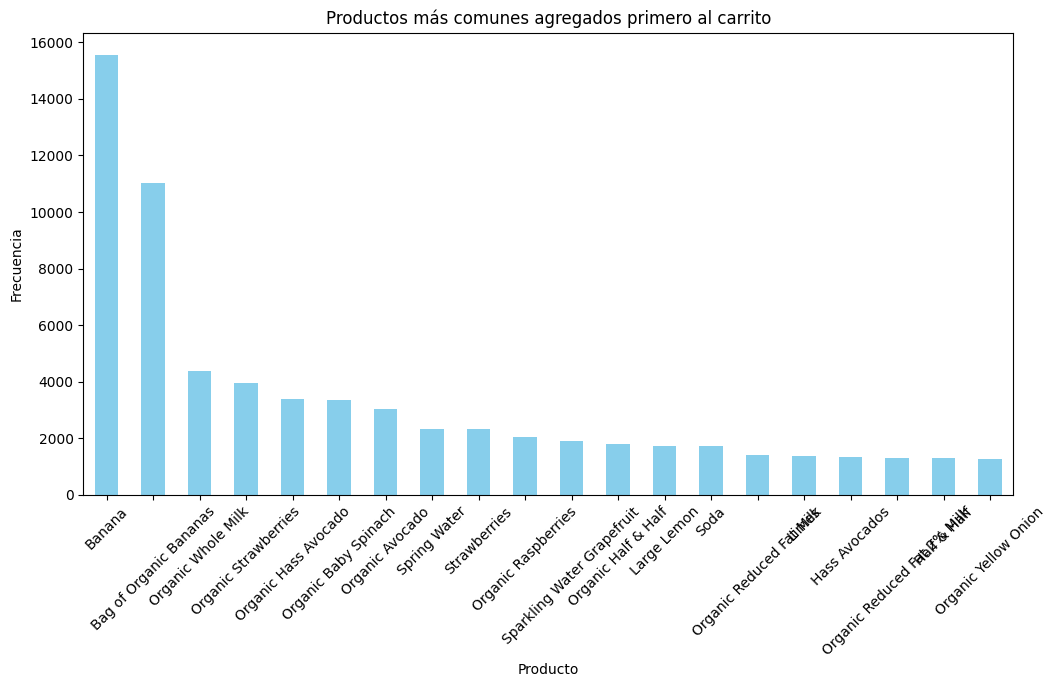

In [57]:
top_first_in_cart_df.plot(kind='bar', x='Product Name', y='Frequency', color='skyblue', figsize=(12, 6),
                          xlabel='Producto', ylabel='Frecuencia', title='Productos más comunes agregados primero al carrito',
                          rot=45, legend=False)
plt.show()


Los productos más comunes que la gente agrega primero a su carrito son cosas frescas y básicas como plátanos, leche orgánica, y fresas. También les gusta el agua embotellada y los refrescos, además de productos lácteos orgánicos como leche reducida en grasa. Los limones y limas también son populares. Parece que la gente se enfoca en lo saludable y lo práctico al principio de su compra en línea.

## Conclusion general del proyecto:

Después de explorar los datos y hacer varias visualizaciones, podemos decir que hemos aprendido mucho sobre los patrones de compra de los clientes en nuestra plataforma. Hemos descubierto que la mayoría de las personas tienden a agregar productos comunes como plátanos, leche orgánica y aguacates a sus carritos primero. Esto tiene sentido, ya que son productos básicos y populares en la dieta diaria.

También hemos observado que hay una proporción significativa de clientes que repiten sus pedidos, lo que sugiere que están satisfechos con los productos que han comprado anteriormente. Esto es una buena señal para nosotros, ya que indica la fidelidad de los clientes y la calidad de nuestros productos.

Además, al analizar la cantidad de productos que las personas suelen comprar en un solo pedido, encontramos que la mayoría de los pedidos contienen entre 0 y 10 productos, lo que sugiere que nuestros clientes suelen hacer compras de tamaño moderado.

En general, este proyecto nos ha brindado información valiosa sobre los hábitos de compra de nuestros clientes y nos ha ayudado a identificar áreas donde podemos mejorar y satisfacer mejor sus necesidades. Con este conocimiento en mente, podemos tomar decisiones más informadas para optimizar nuestra plataforma y mejorar la experiencia del cliente.